**Reproduction of Figure 3A+C from Bachmann *et al.***

This Colaboratory notebook creates an SED-ML file to partially reproduce  Figures 3A and 3C from Bachmann *et al.* 2011([Link](https://doi.org/10.1038/msb.2011.50)).

Version: 2.0
Date: 2021-06-28

In [ ]:
# install Tellurium if required
!pip3 install tellurium

In [2]:
# import required packages
import os
import tellurium as te
import phrasedml

In [3]:
# mount Google Drive if working in GoogleColabs
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# set working directory - change file path for .ipynb manually as required
workingDir = '/content/drive/My Drive/bachmann_archiv/Group4_GenerationSEDML/Tellurium/experiment/'
os.chdir(workingDir)

In [5]:
# retrieve SBML model from model folder and set as reference for phraSEDML
sbml = "../model/Bachmann2011.xml"
ant_str = te.sbmlToAntimony(sbml)
sbml_str = te.antimonyToSBML(ant_str)
phrasedml.setReferencedSBML('../model/Bachmann2011.xml', sbml_str)
# print(sbml_str)

True

In [6]:
# create phraSEDML string as template for SED-ML
# tSTAT5, pJAK2, pEpoR need to be defined as new entities, not included in model (formula in Supplementary Information)
phrasedml_str = """
    model1 = model "{}"
    sim1 = simulate uniform(0, 250, 1000) 
    task1 = run sim1 on model1

    plot "Figure 3A pSTAT5" time vs pSTAT5
    plot "Figure 3A CIS" time vs CIS
    plot "Figure 3A SOCS3" time vs SOCS3
    plot "Figure 3C SOCS mRNA" time vs SOCS3RNA
    plot "Figure 3C CIS mRNA" time vs CISRNA

    report "Report Figure 3" task1.time, task1.pSTAT5, task1.CIS, task1.SOCS3, task1.SOCS3RNA, task1.CISRNA

""".format('../model/Bachmann2011.xml')

In [7]:
# convert to SED-ML and create SED-ML file in working directory
sedml_str = phrasedml.convertString(phrasedml_str)
if sedml_str == None:
    raise RuntimeError(phrasedml.getLastError())
print(sedml_str)

with open(os.path.join(workingDir, 'Fig3.sedml'), 'wb') as f:
    f.write(sedml_str.encode('utf-8'))


<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.1.1 with libSBML version 5.19.1. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version3" level="1" version="3">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-2.version-1" source="../model/Bachmann2011.xml"/>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="250" numberOfPoints="1000">
      <algorithm kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="task1" modelReference="model1" simulationReference="sim1"/>
  </listOfTasks>
  <listOfDataGenerators>
    <dataGenerator id="plot_0_0_0" name="time">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> time </ci>
      </math>
      <listOfVariables>
        <variable id="time" symbol="urn:sedml:symbol:time" taskReference="task1" modelReference="model1"/>
      </listOfVariables>
    

/usr/local/lib/python3.7/dist-packages/roadrunner/roadrunner.py:3944: UserWarning:

Simulation requested end point (250.0) not reached, because the maximum number of steps reached.  Possible solutions include:
  * Setting an explicit number of points (i.e. r.simulate(0.0, 250.0, 1001)
  * Setting r.integrator.variable_step_size to 'False'
* Setting 



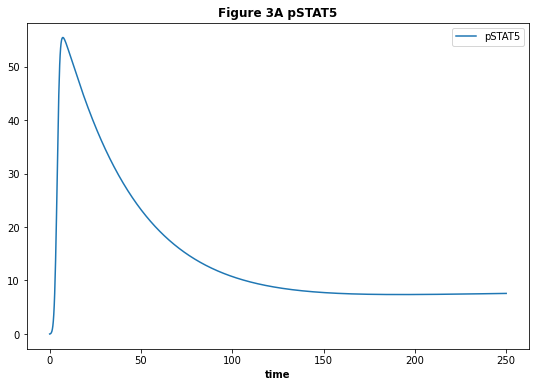

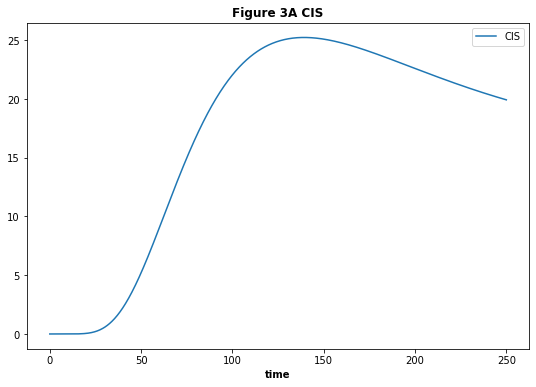

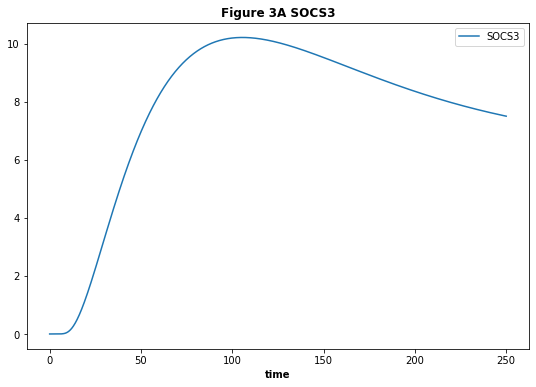

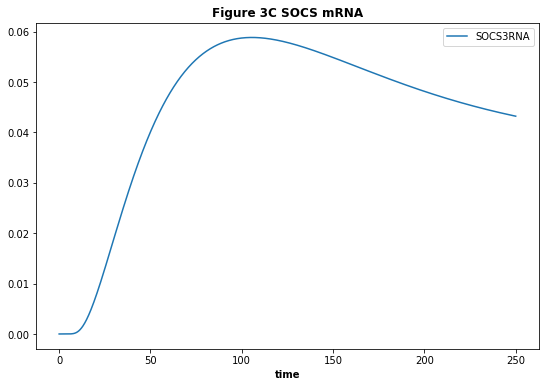

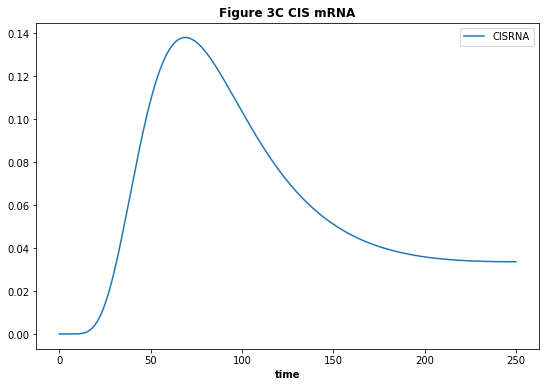

In [8]:
# run the SED-ML file based on the referenced SBML file in ../models/
workingDir = '/content/drive/My Drive/bachmann_archiv/Group4_GenerationSEDML/Tellurium/experiment/'
os.chdir(workingDir)
te.executeSEDML(sedml_str, workingDir)